Task 2: Visualization

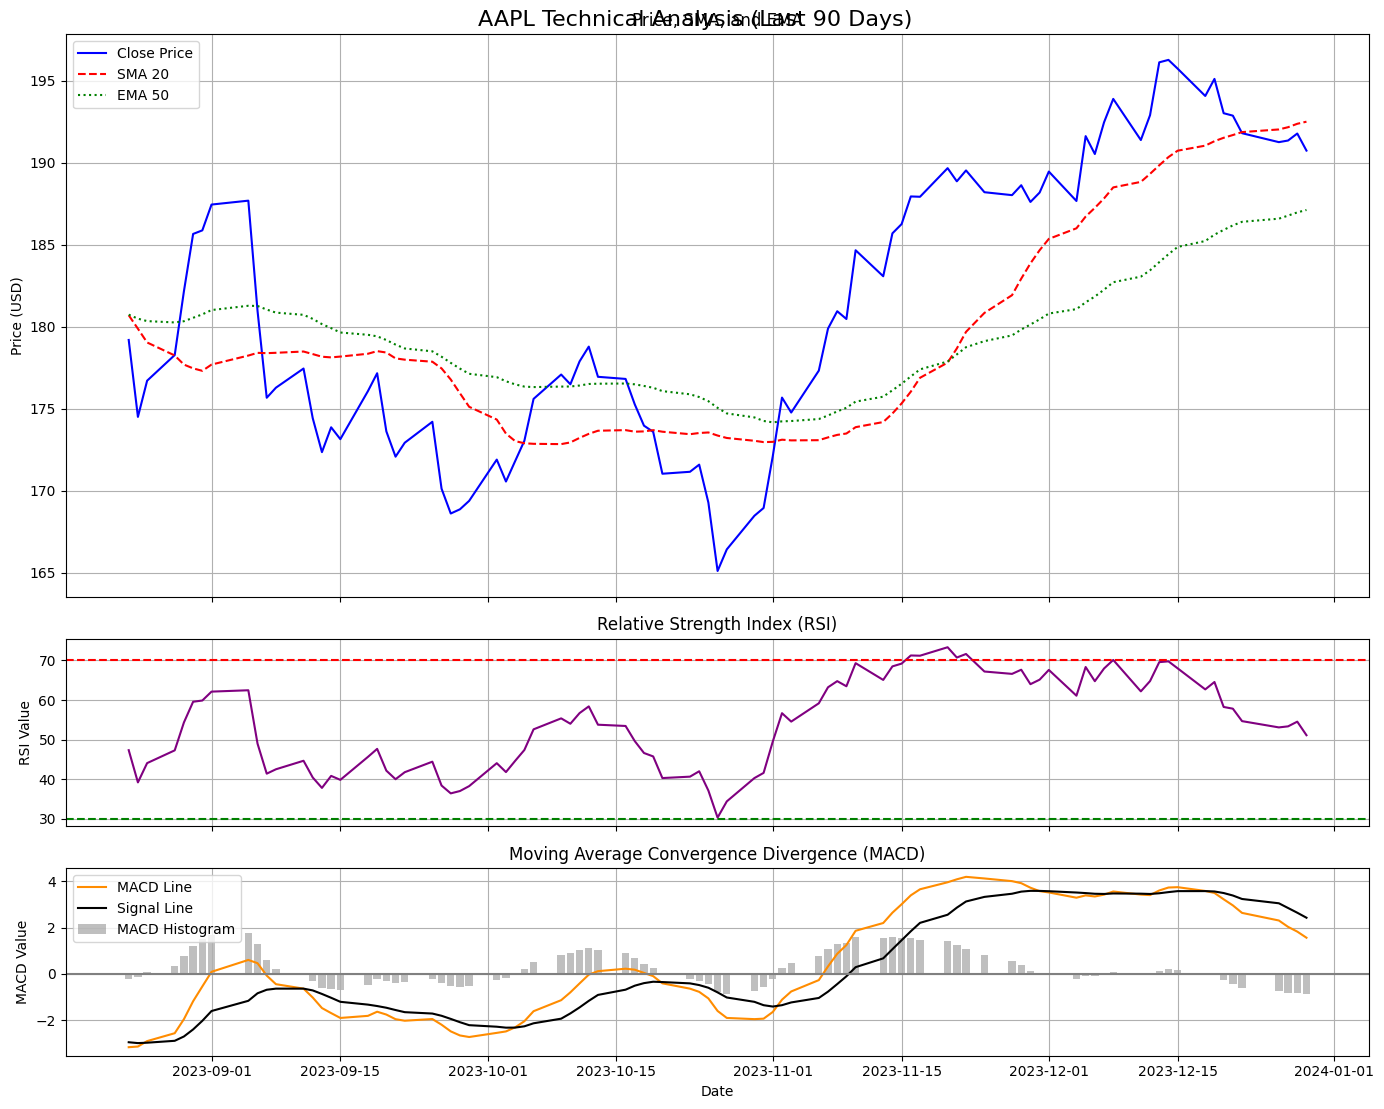

In [1]:
# Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined data
file_path = '../data/all_tickers_indicators.csv'
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Select a single ticker (e.g., Apple) for visualization
ticker_df = df[df['Ticker'] == 'AAPL']
# Use the last 90 trading days for a focused view
viz_df = ticker_df.iloc[-90:] 

# --- A. Price and Moving Averages Plot ---
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True, 
                                    gridspec_kw={'height_ratios': [3, 1, 1]})
plt.suptitle('AAPL Technical Analysis (Last 90 Days)', fontsize=16, y=0.92)

# Subplot 1: Price and Moving Averages
ax1.plot(viz_df.index, viz_df['Close'], label='Close Price', color='blue')
ax1.plot(viz_df.index, viz_df['SMA_20'], label='SMA 20', color='red', linestyle='--')
ax1.plot(viz_df.index, viz_df['EMA_50'], label='EMA 50', color='green', linestyle=':')
ax1.set_ylabel('Price (USD)')
ax1.set_title('Price, SMA, and EMA')
ax1.legend(loc='upper left')
ax1.grid(True)

# Subplot 2: Relative Strength Index (RSI)
ax2.plot(viz_df.index, viz_df['RSI_14'], label='RSI 14', color='purple')
ax2.axhline(70, color='red', linestyle='--') # Overbought line
ax2.axhline(30, color='green', linestyle='--') # Oversold line
ax2.set_ylabel('RSI Value')
ax2.set_title('Relative Strength Index (RSI)')
ax2.grid(True)

# Subplot 3: MACD
ax3.plot(viz_df.index, viz_df['MACD'], label='MACD Line', color='darkorange')
ax3.plot(viz_df.index, viz_df['MACD_Signal'], label='Signal Line', color='black')
# MACD Histogram using bar plot
ax3.bar(viz_df.index, viz_df['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
ax3.axhline(0, color='gray', linestyle='-')
ax3.set_ylabel('MACD Value')
ax3.set_title('Moving Average Convergence Divergence (MACD)')
ax3.legend(loc='upper left')
ax3.grid(True)
ax3.set_xlabel('Date')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# This demonstrates the primary technical indicators for the correlation analysis .